In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pylab as pl
import pdb
plt.style.use(['default'])

D:\Program\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: numpy.arange
  


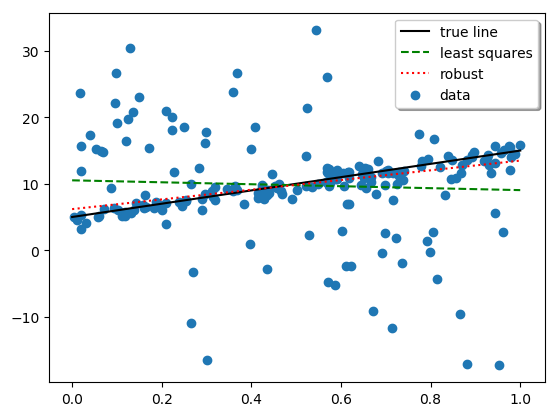

theta_ols:  [[10.51970885]
 [-1.47494271]]
theta_rob:  [[6.18403371]
 [7.30684806]]


In [6]:

n = 200
np.random.seed(0) 
x = np.random.rand(n,1)
z = np.zeros([n,1])
k = n*0.4
rp = np.random.permutation(n)
outlier_subset = rp[1:int(k)]
z[outlier_subset] = 1 #outliers
y = (1-z)*(10*x + 5 + np.random.randn(n,1)) + z * (20 - 20*x + 10*np.random.randn(n,1))

#Plot data and true line
plt.scatter(x, y,label="data")
t = pl.frange(0,1,0.01)
plt.plot(t, 10*t+5, 'k-',label='true line')


# ordinary least squares 
x_p1 = np.hstack((np.ones((n,1)), x))
theta = np.linalg.inv(x_p1.T@x_p1)@x_p1.T@y
plt.plot(t, theta[1]*t+theta[0], 'g--',label = 'least squares')


# robust regression MM algorithm
iter_rob = 30
theta_rob = np.random.rand(2,1)
for i in range(iter_rob):
    r = y - x_p1@theta_rob
    c = (r**2+1)**(-0.5)
    diag_c = np.diag(list(c.T[0]))
    theta_rob = np.linalg.inv(x_p1.T@diag_c@x_p1)@x_p1.T@diag_c@y
plt.plot(t, theta_rob[1,0]*t+theta_rob[0,0], 'r:',label='robust')

legend = plt.legend(loc='upper right', shadow=True)
plt.rcParams['savefig.dpi'] = 200
plt.show()
print("theta_ols: ", theta)
print("theta_rob: ", theta_rob)
